## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
import numpy as np

## Read result data from backbone experiment

In [2]:
df_maize_ear = pd.read_csv('../ExperimentData/BackboneExperimentData/MaizeEar_results_per_mask.csv')
df_maize_uav = pd.read_csv('../ExperimentData/BackboneExperimentData/MaizeUAV_results_per_mask.csv')
df_soil = pd.read_csv('../ExperimentData/BackboneExperimentData/Soil_results_per_mask.csv')

df = pd.concat([df_maize_ear, df_maize_uav, df_soil], ignore_index=True)
df['Mask N'] = df['Mask N'].astype('category')
df['Sam generation'] = df['Sam generation'].astype(str)
df['Dataset'] = df['Dataset'].apply(lambda x: os.path.basename(x))
df['Sam update'] = df['Sam generation']
df.loc[df['Weights path'].str.contains('2.1_'),'Sam update'] = '2.1'

rename_dict = {'sam_vit_b_01ec64.pth': 'ViT-B',
                'sam_vit_l_0b3195.pth': 'ViT-L',
                'sam_vit_h_4b8939.pth': 'ViT-H',
                'sam2_hiera_tiny.pt'  : 'Hiera-T',
                'sam2_hiera_small.pt' : 'Hiera-S',
                'sam2_hiera_base_plus.pt': 'Hiera-B+',
                'sam2_hiera_large.pt': 'Hiera-L', 
                'sam2.1_hiera_tiny.pt': 'Hiera-T', 
                'sam2.1_hiera_small.pt': 'Hiera-S',
                'sam2.1_hiera_base_plus.pt' : 'Hiera-B+', 
                'sam2.1_hiera_large.pt': 'Hiera-L',}

df['Weights path'] = df['Weights path'].replace(rename_dict)
df.rename(columns={'Weights path': 'Backbone'})
print(df.head())
print(df.keys())
print(df['Weights path'].unique())
print(df.dtypes)
print(df['Sam generation'].unique())

#df_maize_uav.describe()
#df_soil.describe()

   Dice per mask  Gdice per mask  IoU per mask Mask N Sam generation  \
0       0.970217        0.942568      0.943671      0              1   
1       0.973768        0.949315      0.950069      1              1   
2       0.969670        0.941686      0.942684      2              1   
3       0.977234        0.955906      0.956390      3              1   
4       0.977769        0.957007      0.957372      4              1   

  Weights path   Dataset Sam update  
0        ViT-B  MaizeEar          1  
1        ViT-B  MaizeEar          1  
2        ViT-B  MaizeEar          1  
3        ViT-B  MaizeEar          1  
4        ViT-B  MaizeEar          1  
Index(['Dice per mask', 'Gdice per mask', 'IoU per mask', 'Mask N',
       'Sam generation', 'Weights path', 'Dataset', 'Sam update'],
      dtype='object')
['ViT-B' 'ViT-L' 'ViT-H' 'Hiera-T' 'Hiera-S' 'Hiera-B+' 'Hiera-L']
Dice per mask      float64
Gdice per mask     float64
IoU per mask       float64
Mask N            category
Sam gen

## Data visualization

In [3]:
def read_sign_letters(file_paths: list[str]):
    dset_dfs = []
    for file_path in file_paths:
        df_dset = pd.read_csv(file_path)
        dset_name = file_path.split('Letters')[-1].split('.csv')[0]
        df_dset['Dataset'] = dset_name
        dset_dfs.append(df_dset)
    df_conc = pd.concat(dset_dfs, ignore_index=True)
    return df_conc

def get_violin_plot(df, xkey, ykey, colour_key):
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure(dpi=200)
    sns.violinplot(data=df, x=xkey, y=ykey, hue=colour_key, color='#2fb2b2') # Smart agricultural technology color "#2fb2b2"
    plt.show()
    
def get_box_plot(df, xkey, ykey, colour_key, grid_key):
    plt.rcParams["font.family"] = "Times New Roman"
    
    g = sns.FacetGrid(df, height=7, col=grid_key, sharex=False, sharey=True)
    g.figure.set_dpi(150)
    g.map_dataframe(sns.boxplot, x=xkey, y=ykey, hue=colour_key, palette='viridis', width=0.5)  # Set width to 0.5
    g.figure.subplots_adjust(wspace=0, hspace=0)
    for label, ax in g.axes_dict.items():
        ax.set_title('')  # remove the title generated by sns.FacetGrid
        ax.set_xlabel(label)  # use the label from the dataframe as xlabel
        if label == '1':
            ax.legend(loc='upper right')
        elif label == '2':
            ax.yaxis.set_visible(False)
            print("")

    plt.ylim(0, 1)
    plt.show()

def _draw_text(ax, x, y, text):
    if not pd.isna(text):
        ax.text(x, y, text, horizontalalignment='center', size='medium', color='black', weight='semibold')

def get_box_plot_plt(df, xkey, ykey, colour_key, col_key, row_key, df_sign_letters: pd.DataFrame = None):
    custom_cmap1 = sns.color_palette(['#aa4499']) #alternatively from https://davidmathlogic.com/colorblind/ : '#332288'
    custom_cmap2 = sns.color_palette(['#117733', '#44aa99']) #   '#45a677', '#3c6582'
   
    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(dpi=400, figsize=(8, 6)) 
    gs = fig.add_gridspec(ncols=3, nrows=3, wspace=0, hspace=0)
    legend_handles = []
    for i, row_title in enumerate(df[row_key].unique()):
        df_row = df[df[row_key] == row_title]
        for j, col_title in enumerate(df[col_key].unique()):
            df_col = df_row[df_row[col_key] == col_title]
            if col_title == "1":
                ax = fig.add_subplot(gs[i, j])
                box_width = 0.6
                palette = custom_cmap1
    
            elif col_title == "2":
                ax = fig.add_subplot(gs[i, j:])
                ax.yaxis.set_visible(False)
                box_width = 0.8
                palette = custom_cmap2
                

            bp = sns.boxplot(data=df_col, 
                             x=xkey, 
                             y=ykey, 
                             hue=colour_key, 
                             ax=ax, 
                             width=box_width, 
                             palette=palette,  
                             legend=False, 
                             flierprops={"marker": ".", "markerfacecolor": "white", "markersize": 4})
            
            if len(legend_handles) < 3:
                for i, sam_update in enumerate (df_col[colour_key].unique()):
                    legend_handles.append(mpatches.Patch(color=palette[i],label=sam_update))
               
            ax.set_xlabel('')
            ax.set_ylabel(row_title)
            ax.set_ylim(0, 1.15)
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            if df_sign_letters is not None:
                sign_letters0 = df_sign_letters.loc[df_sign_letters['Dataset'] == row_title]
                sign_letters = sign_letters0['letter'].to_list()
                if col_title == "1":
                    offset = 0
                    group_split = False
                elif col_title == "2":
                    offset = 3
                    group_split = True
                for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
                    if group_split:
                        _draw_text(ax, tick - box_width * 0.25, 1.05, sign_letters[tick + offset])
                        offset += 1
                        _draw_text(ax, tick + box_width * 0.25, 1.05, sign_letters[tick + offset])
                        
                    else:
                        _draw_text(ax, tick, 1.05, sign_letters[tick])
                if i == 2 and j == 1:
                    ax.legend(handles=legend_handles, loc='lower right').set_title('SAM version')

    
    gs.figure.supylabel(ykey)


def get_swarm_plot(df, xkey, ykey, colour_key):
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure(dpi=200)
    sns.swarmplot(data=df, x=xkey, y=ykey, hue=colour_key, color='#2fb2b2')
    plt.show()

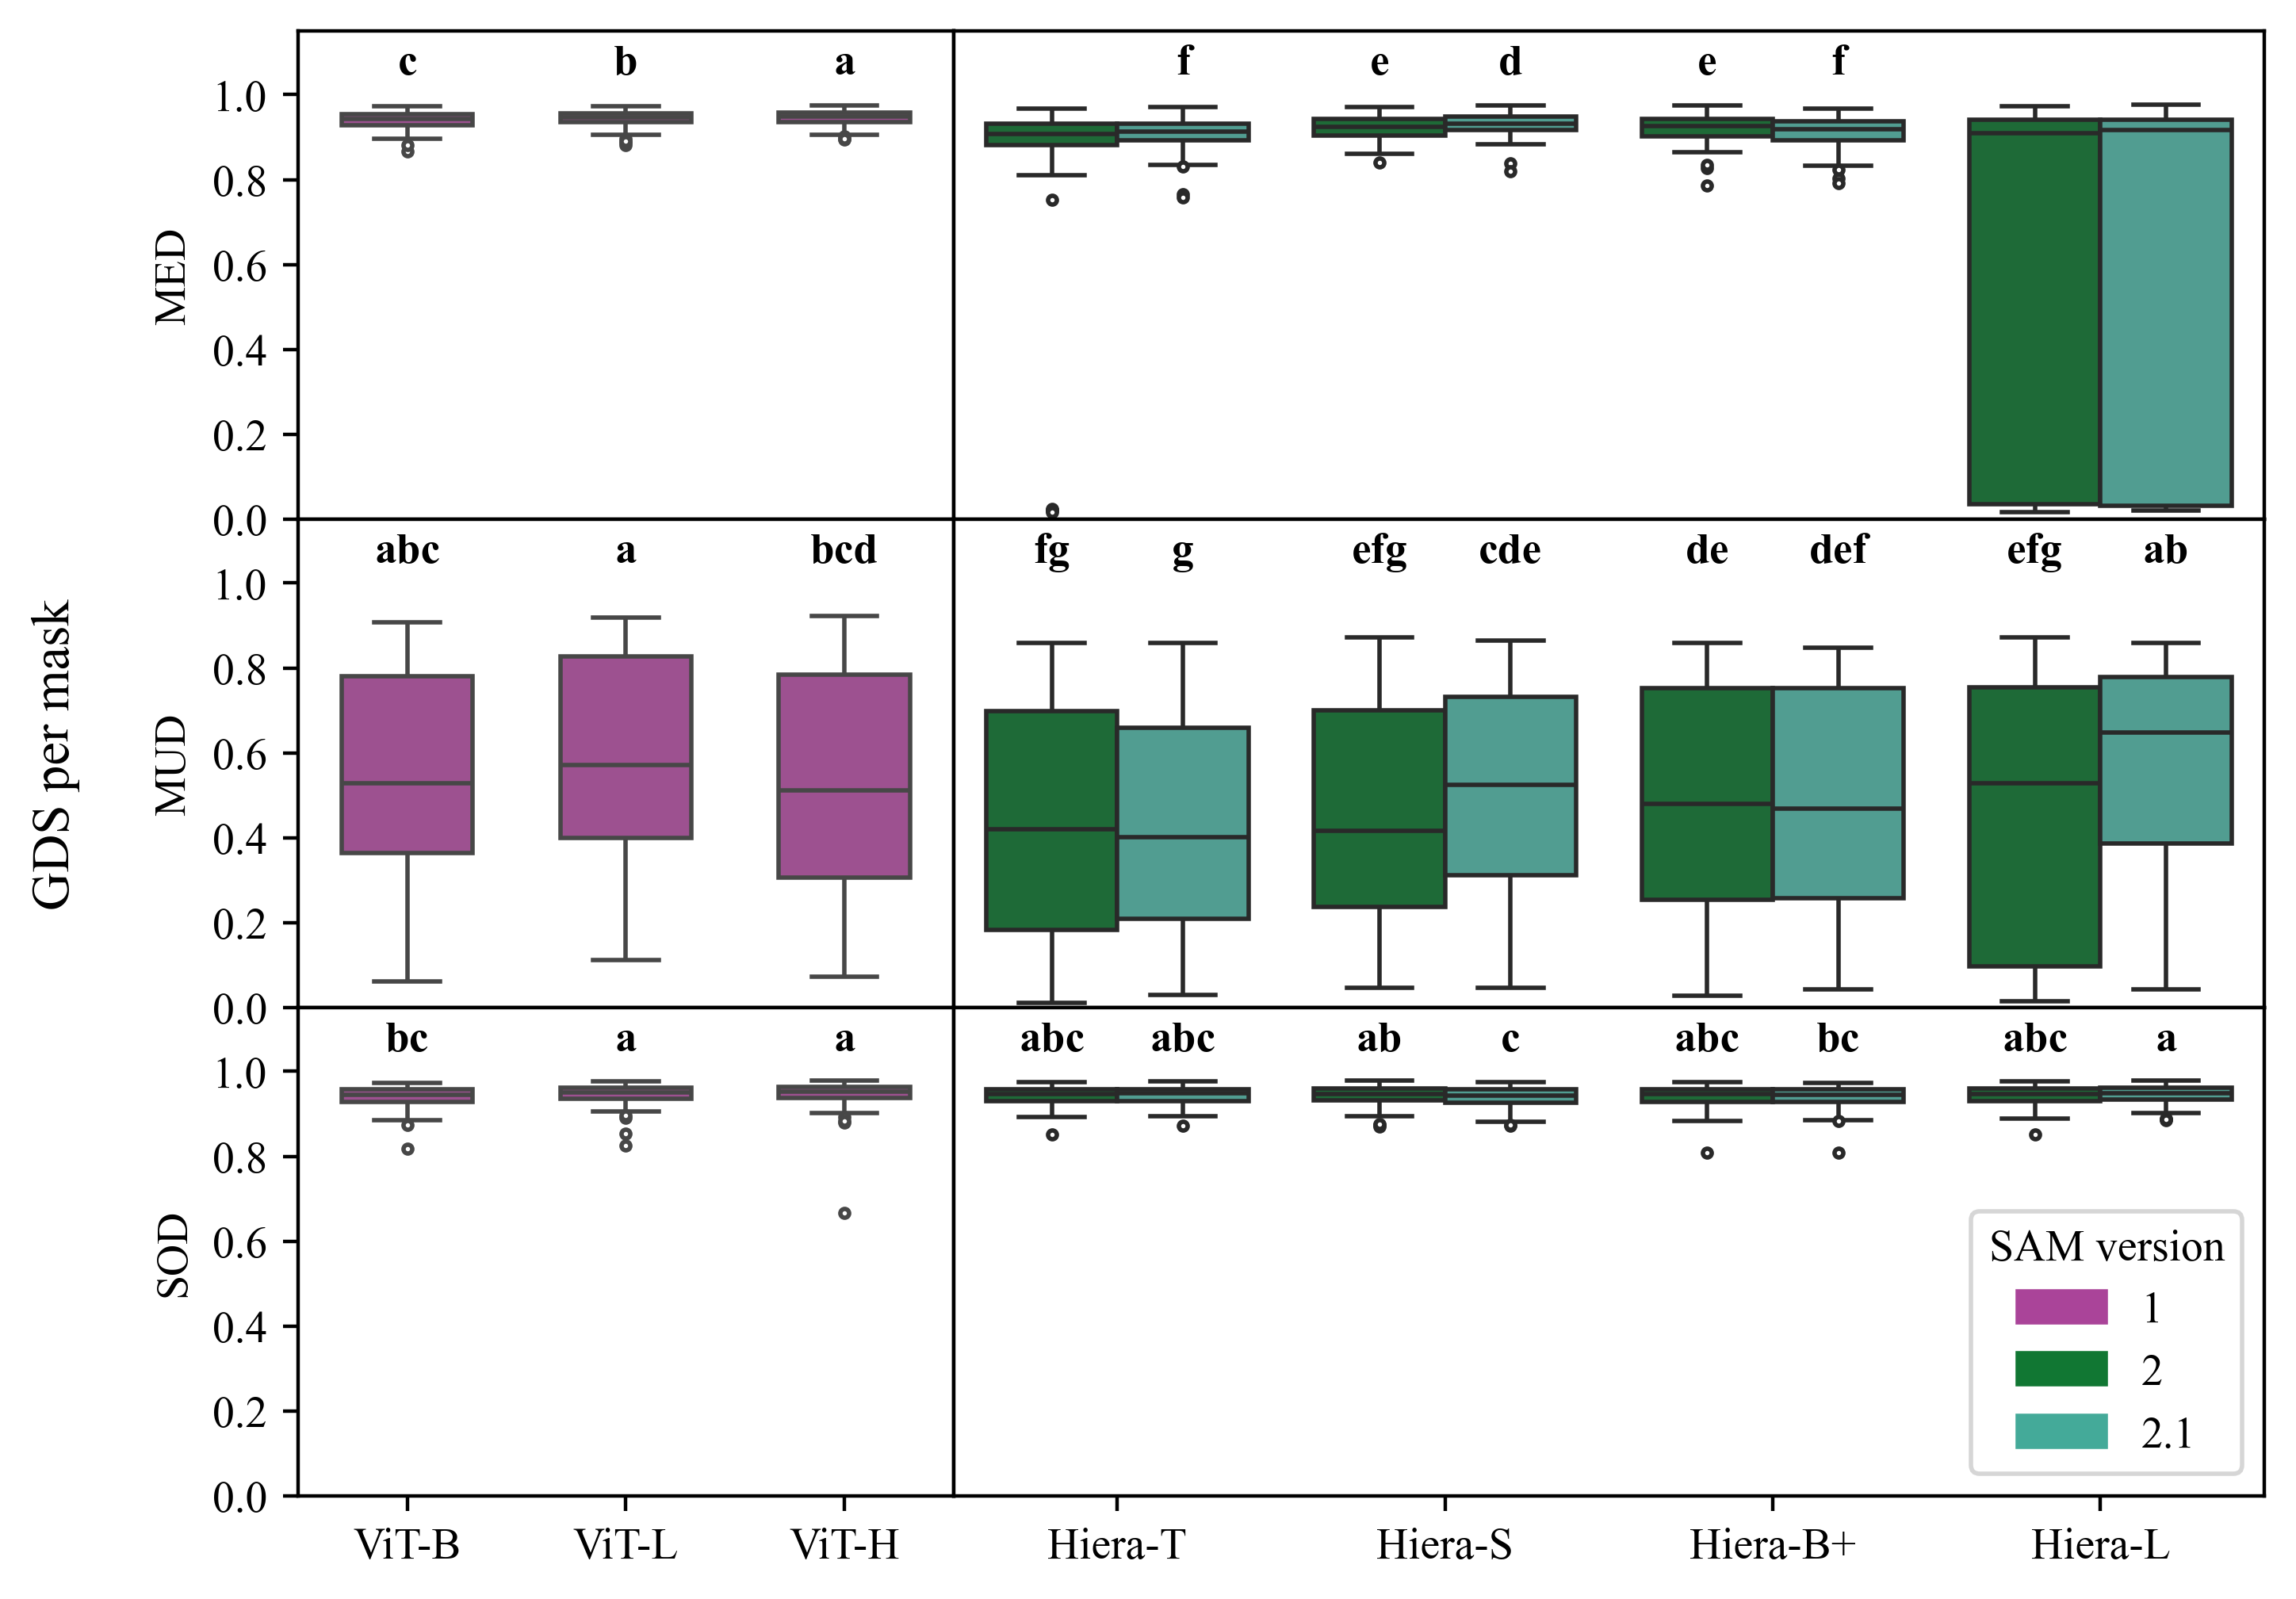

In [4]:
df_sign_letters = read_sign_letters(['SignLettersMED.csv', 'SignLettersMUD.csv', 'SignLettersSOD.csv'])
df_plot =df.copy()
df_plot['Dataset'] = df_plot["Dataset"].replace({'MaizeEar': 'MED', 'MaizeUAV': 'MUD', 'Soil': 'SOD'})
df_plot = df_plot.rename(columns={'Gdice per mask': 'GDS per mask'})
#print(df_plot.head())

get_box_plot_plt(df_plot, 'Weights path', 'GDS per mask', 'Sam update', 'Sam generation', 'Dataset', df_sign_letters)
#get_box_plot(df.loc[df["Dataset"]=="MaizeUAV"], 'Weights path', 'Gdice per mask', 'Sam generation')
#get_box_plot(df.loc[df["Dataset"]=="Soil"], 'Weights path', 'Gdice per mask', 'Sam generation')

In [10]:
df_plot.groupby(['Dataset', 'Weights path', 'Sam update'])[['GDS per mask']].describe()


GDS per mask                                \
                                       count      mean       std       min   
Dataset Weights path Sam update                                              
MED     base +       2                 100.0  0.919603  0.032013  0.787057   
                     2.1               100.0  0.910858  0.034185  0.790993   
        large        2                 100.0  0.667542  0.406987  0.016127   
                     2.1               100.0  0.659237  0.414798  0.021003   
        small        2                 100.0  0.921685  0.027367  0.840483   
                     2.1               100.0  0.929780  0.026012  0.819721   
        tiny         2                 100.0  0.870019  0.178063  0.016666   
                     2.1               100.0  0.908597  0.036298  0.757732   
        vit b        1                 100.0  0.939427  0.020005  0.866927   
        vit h        1                 100.0  0.946108  0.016748  0.894162   
        vit l        1                 100.0  0.942574  0.018403  0.881598   
MUD     base +       2                 100.0  0.493194  0.265833  0.027765   
                     2.1               100.0  0.487485  0.259978  0.042342   
        large        2                 100.0  0.463583  0.302004  0.015953   
                     2.1               100.0  0.570013  0.239705  0.042966   
        small        2                 100.0  0.456125  0.252151  0.047464   
                     2.1               100.0  0.500629  0.247744  0.046757   
        tiny         2                 100.0  0.432351  0.277047  0.011089   
                     2.1               100.0  0.422559  0.263593  0.030695   
        vit b        1                 100.0  0.542197  0.248036  0.062452   
        vit h        1                 100.0  0.518181  0.260908  0.072700   
        vit l        1                 100.0  0.581084  0.237962  0.111876   
SOD     base +       2                 100.0  0.940736  0.024924  0.809068   
                     2.1               100.0  0.939384  0.025106  0.808816   
        large        2                 100.0  0.944120  0.021272  0.850710   
                     2.1               100.0  0.945699  0.020370  0.885422   
        small        2                 100.0  0.942823  0.022783  0.869577   
                     2.1               100.0  0.940013  0.022919  0.871430   
        tiny         2                 100.0  0.943393  0.020588  0.850936   
                     2.1               100.0  0.943493  0.020221  0.872619   
        vit b        1                 100.0  0.940552  0.024403  0.817614   
        vit h        1                 100.0  0.945899  0.034731  0.666750   
        vit l        1                 100.0  0.944922  0.024186  0.825708   

                                                                         
                                      25%       50%       75%       max  
Dataset Weights path Sam update                                          
MED     base +       2           0.902217  0.927086  0.942821  0.973854  
                     2.1         0.892334  0.918303  0.937417  0.966683  
        large        2           0.035201  0.908876  0.940221  0.972045  
                     2.1         0.031571  0.917265  0.940399  0.975876  
        small        2           0.904485  0.923451  0.943236  0.971021  
                     2.1         0.916025  0.932475  0.948411  0.975365  
        tiny         2           0.881384  0.907944  0.931824  0.967686  
                     2.1         0.891981  0.913758  0.930887  0.970655  
        vit b        1           0.928427  0.943240  0.954086  0.973470  
        vit h        1           0.935524  0.948092  0.957579  0.975490  
        vit l        1           0.934853  0.946270  0.955418  0.973555  
MUD     base +       2           0.253765  0.479704  0.751857  0.858480  
                     2.1         0.258702  0.469111  0.752016  0.848553  
        large        2           0.0964

In [11]:
df_plot.groupby(['Dataset'])[['GDS per mask']].describe()

GDS per mask                                                    \
               count      mean       std       min       25%       50%   
Dataset                                                                  
MED           1100.0  0.874130  0.209981  0.016127  0.902114  0.929205   
MUD           1100.0  0.497036  0.263733  0.011089  0.275352  0.498323   
SOD           1100.0  0.942821  0.024081  0.666750  0.930603  0.947893   

                             
              75%       max  
Dataset                      
MED      0.946819  0.975876  
MUD      0.753398  0.922341  
SOD      0.959304  0.979209